In [1]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier, NaiveBayesClassifier
from sklearn.linear_model import LogisticRegression
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np

In [3]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Basic preprocessing (10 marks)

In [4]:
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    # Converting the multiclass labels to binary labels
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]


def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    #print(data_line)
    return (convert_label(data_line[1]), data_line[2])

In [5]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION

# Input: a string of one review
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    return text.split()
    #return []

In [8]:
text = "RT @colonelkickhead: Another bloody instant restaurant week?!?! Seriously! They just jumped the shark riding two other sharks powered by sh…"
pre_process(text)

['RT',
 '@colonelkickhead:',
 'Another',
 'bloody',
 'instant',
 'restaurant',
 'week?!?!',
 'Seriously!',
 'They',
 'just',
 'jumped',
 'the',
 'shark',
 'riding',
 'two',
 'other',
 'sharks',
 'powered',
 'by',
 'sh…']

# Question 2: Basic Feature Extraction (20 marks)

In [103]:
global_feature_dict = {} # A global dictionary of features

# Solution
from collections import Counter

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # Just returning all words in the 
    #feature_vector = Counter(tokens) # Bag-of-Words counts
    feature_vector = {x:1 for x in Counter(tokens).keys()}  # binary Set-of-Words
    global_feature_dict.update(feature_vector) # just add all counts
    return feature_vector

In [104]:
# solution 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [105]:
#solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on items %d - %d" % (i, i+fold_size))
        
        fold_test_data = dataset[i:i+fold_size]   # get test split on this fold
        fold_train_data = dataset[:i] + dataset[i+fold_size:] # get train split on this fold
        classifier = train_classifier(fold_train_data) # train classifier on the training data
        y_true = [x[1] for x in fold_test_data] # get ground-truth labels
        y_pred = predict_labels([x[0] for x in fold_test_data], classifier) # use classifier to predict
        results.append(precision_recall_fscore_support(y_true, y_pred, average='weighted')) # get results
        print(classification_report(y_true,y_pred))  # see classification report for fold
        
    avg_results = [np.mean([x[0] for x in results]),
                   np.mean([x[1] for x in results]),
                   np.mean([x[2] for x in results])
                ]
    return avg_results

In [106]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [107]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
21664


In [108]:
# QUESTION 3 - Make sure there is a function call here to the
# crossValidate function on the training set to get your results
# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# let's look at the representation of the first instance of training:
print(train_data[0])

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')

cross_validate(train_data, 10)


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
({'Says': 1, 'the': 1, 'Annies': 1, 'List': 1, 'political': 1, 'group': 1, 'supports': 1, 'third-trimester': 1, 'abortions': 1, 'on': 1, 'demand.': 1}, 'FAKE')
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
21664
Fold start on items 0 - 820
Training Classifier...
              precision    recall  f1-score   support

        FAKE       0.47      0.48      0.47       339
        REAL       0.63      0.61      0.62       481

    accuracy                           0.56       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.56      0.56      0.56       820

Fold start on items 820 - 1640
Training Classifier...
              precision    recall  f1-score   support

        FAKE       0.50      0.49      0.49       375
        REAL       0.58      0.58      0.58       445

  

[0.5743304941283904, 0.5744863630902319, 0.574070851376657]

# Results for the binary feature presence case:
[0.5743304941283904, 0.5744863630902319, 0.574070851376657]

# Result for the bag-of-words counts version of to_feature_vector:
[0.5694539602967532, 0.5694791541511475, 0.5691346336944713]

# 4. Error Analysis (10 marks)

In [28]:
# take one fold for analysis
fold_size = int(len(train_data)/10) + 1
i = 0 # take first fold
print("Fold start on items %d - %d" % (i, i+fold_size))
fold_test_data = train_data[i:i+fold_size]
fold_train_data = train_data[:i] + train_data[i+fold_size:]
classifier = train_classifier(fold_train_data)
y_true = [x[1] for x in fold_test_data]
y_pred = predict_labels([x[0] for x in fold_test_data], classifier)
print(precision_recall_fscore_support(y_true, y_pred, average='weighted'))
print(classification_report(y_true,y_pred))

Fold start on items 0 - 820
Training Classifier...
(0.5653389497412212, 0.5634146341463414, 0.5642945025429343, None)
              precision    recall  f1-score   support

        FAKE       0.47      0.49      0.48       339
        REAL       0.63      0.62      0.62       481

    accuracy                           0.56       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.57      0.56      0.56       820



In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds, labels)
    # note dependent on metrics version you may need:
    #cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

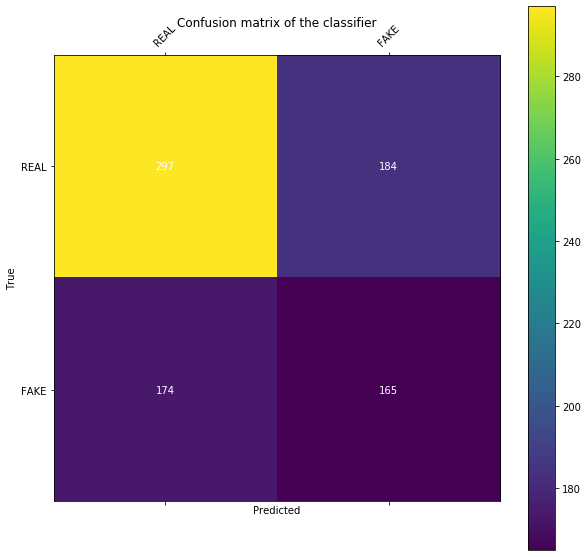

In [30]:
unique_labels = list(set(y_true))
confusion_matrix_heatmap(y_true, y_pred, labels=unique_labels)

# Notes
* We have 184 FNs and 174 FPs

# False positives for FAKE (which real news is being falsely classified as fake)?

In [58]:
count = 0  # for keeping track of position in raw data
with open("false_positives_FAKE.txt", "w") as false_pos_file:
    for instance, prediction in zip(test_data, y_pred):
        text = raw_data[len(train_data) + count][0]
        count+=1
        label = instance[1]
        features = instance[0]
        if prediction == label: # correct/TP, ignore these
            # print('****TP for {1}:****\n\n {0}\n'.format(text, label))  # or print them out if needed
            continue
        if label == "FAKE": # false negative
            continue
        print(text, "uslim"in text)
        false_pos_file.write(text)
        false_pos_file.write("\n" + str(features))
        false_pos_file.write("\n" + "*" * 50)
        false_pos_file.write("\n")

The Bush tax cuts helped to create a substantial part of the deficit. False
Half of illegal immigrants come on legal visas and then overstay. False
The Alternative Minimum Tax was never intended to hit people in middle income, upper middle income. It was meant for people who are rich and evading taxes. False
Says residents of Texas and San Antonio can be fired or denied jobs because they are gay. False
The failings in our civil service are encouraged by a system that makes it very difficult to fire someone even for gross misconduct. False
Says as Indiana governor, he has made record investments in education. False
President Barack Obamas spending drove us $5 trillion deeper in debt. False
Many uninsured Americans are young. False
During a town hall meeting on health care, "ABC didn't even allow ads that opposed the president's health care plan to be aired." False
Says Texas has one state inspector for every 4,500 oil and gas wells. False
The U.S. House rule barring members from wearing

After looking at the FP file, some observations:
* Claims involving numbers and proportions are common (e.g. "Half of illegal immigrants come on legal visas and then overstay.", "President Barack Obamas spending drove us $5 trillion deeper in debt.")- could add a number feature which picks up both written numbers and digits
* Some punctuation could be useful, like dollar signs for money claims, however also need to look at separation (e.g. "money.They") and also use of square brackets from journalist/corpus annotators may need removing/cleaning



# False negatives for FAKE (which ones is the classifier missing?)

In [57]:
count = 0  # for keeping track of position in raw data
with open("false_negatives_FAKE.txt", "w") as false_neg_file:
    for instance, prediction in zip(test_data, y_pred):
        text = raw_data[len(train_data) + count][0]
        count+=1
        label = instance[1]
        features = instance[0]
        if prediction == label: # correct/TP, ignore these
            #print('****TP for {1}:****\n\n {0}\n'.format(text, label))  # or print them out if needed
            continue
        if prediction == "FAKE": # false positive, ignore
            continue
        print(text, "uslim"in text)
        false_neg_file.write(text)
        false_neg_file.write("\n" + str(features))
        false_neg_file.write("\n" + "*" * 50)
        false_neg_file.write("\n")

Girl Scouts USAs curriculum promotes Margaret Sanger, founder of Planned Parenthood, Betty Friedan, founder of NARAL Prochoice, and other pro-abortion women as icons for our children to emulate. False
Since 1988, Congress has raised its own salary 15 times to reflect rising costs. But raised the minimum wage only three times. False
AIDS was transmitted to humans because one guy had sex with a monkey and then started having sex with men. False
Blocking travel from countries with Ebola should be possible because President Barack Obama has sealed off Israel in the past. False
94 percent of those that are employed by the Department of Education at the federal level were deemed by the department as nonessential employees. False
Says many local governments in Wisconsin already require employees to pay 20 percent, 30 percent or even 40 percent of their health insurance premiums. False
Says she has quadrupled agents to secure our border. False
More than 50 percent of those people getting minim

In [60]:
count = 0  # for keeping track of position in raw data
with open("true_positives_FAKE.txt", "w") as true_pos_file:
    for instance, prediction in zip(test_data, y_pred):
        text = raw_data[len(train_data) + count][0]
        count+=1
        label = instance[1]
        features = instance[0]
        if prediction != label or label == "REAL": # error or TN, ignore these
            #print('****TP for {1}:****\n\n {0}\n'.format(text, label))  # or print them out if needed
            continue
        true_pos_file.write(text)
        true_pos_file.write("\n" + str(features))
        true_pos_file.write("\n" + "*" * 50)
        true_pos_file.write("\n")

In [61]:
count = 0  # for keeping track of position in raw data
with open("true_negatives_FAKE.txt", "w") as true_neg_file:
    for instance, prediction in zip(test_data, y_pred):
        text = raw_data[len(train_data) + count][0]
        count+=1
        label = instance[1]
        features = instance[0]
        if prediction != label or label == "FAKE": # error or TP, ignore these
            #print('****TP for {1}:****\n\n {0}\n'.format(text, label))  # or print them out if needed
            continue
        true_neg_file.write(text)
        true_neg_file.write("\n" + str(features))
        true_neg_file.write("\n" + "*" * 50)
        true_neg_file.write("\n")

After looking at the FN file, there are several observations:
* Claims about groups and/or foreign countries (to the USA) are prevalent (e.g. "Blocking travel from countries with Ebola should be possible because President Barack Obama has sealed off Israel in the past." 
* Possibly sentiment is stronger than in the FNs with stronger claims, possibly exaggerated ("Under Greg Abbott, Texas four-year-olds would be forced to undergo standardized tests." "Poll after poll after poll shows me beating Hillary.")
* Many numerical claims again, though in different formats. May be more extreme numerical claims or vague compared to the other REAL TPs - in either way, given different formats need to join represent numerical claims in a similar way whether in figures or in words if there is something about the nature of the claims which means they're fake


# let's have a look at the mutual information of each word with each class

In [98]:
# Mutual_info = p(w and c)/p(w) * p(c)
#all_words = [word for sublist in [x[0] for x in test_data] for word in sublist]
#words = Counter(all_words)
words = Counter()
#classes = Counter([x[1] for x in test_data])
classes = Counter()
words_classes = Counter()
for s, c in train_data:
    for w in s:
        words_classes[w + "&" + c]+=1
        words[w]+=1
    classes[c]+=1

mi_dict = {}
for c in classes:
    print(c)
    mi_dict[c] = {}
    for w in words:
        #print(w)
        p_w = words[w]/sum(words.values())
        p_c = classes[c]/sum(classes.values())
        p_w_c = words_classes[w + "&" + c]/sum(words_classes.values())
        mi = p_w_c / (p_w * p_c)
        #print(mi)
        mi_dict[c][w] = mi
        #mi_dict[w] = words_classes[w + "&" + c]/sum(classes.values())
print(sorted(mi_dict['FAKE'].items(), key=lambda x:x[1], reverse=True))

FAKE
REAL
[('probe.', 2.299831555306008), ('setting', 2.299831555306008), ('begging', 2.299831555306008), ('Cornilles', 2.299831555306008), ('damaging', 2.299831555306008), ("shouldn't", 2.299831555306008), ('lying', 2.299831555306008), ('lawsuit', 2.299831555306008), ('scandal', 2.299831555306008), ('challenges', 2.299831555306008), ('employers.', 2.299831555306008), ('Strategic', 2.299831555306008), ('Kander', 2.299831555306008), ('class,', 2.299831555306008), ('hurting', 2.299831555306008), ('private,', 2.299831555306008), ('Pascrell', 2.299831555306008), ('bulbs', 2.299831555306008), ('Frank', 2.299831555306008), ('scheme.', 2.299831555306008), ('reporters', 2.299831555306008), ('anybodys', 2.299831555306008), ('abolishing', 2.299831555306008), ('Curbelo', 2.299831555306008), ('legislation,', 2.299831555306008), ('Nations', 2.299831555306008), ('Benghazi.', 2.299831555306008), ('HPV', 2.299831555306008), ('apparently', 2.299831555306008), ('felony.', 2.299831555306008), ('win.', 2.

In [ ]:
print(sorted(mi_dict.items(), key=lambda x:x[1], reverse=True))

# Evaluate on test set

In [32]:
# Finally, check the accuracy of your classifier by training on all the tranin data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

(Counter({'The': 1, 'Bush': 1, 'tax': 1, 'cuts': 1, 'helped': 1, 'to': 1, 'create': 1, 'a': 1, 'substantial': 1, 'part': 1, 'of': 1, 'the': 1, 'deficit.': 1}), 'REAL')
Training Classifier...
Done training!
Precision: 0.567481
Recall: 0.568082
F Score:0.567751
